In [5]:
import kagglehub
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("larsen0966/penguins")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\lamia\.cache\kagglehub\datasets\larsen0966\penguins\versions\1


In [6]:
csv_path = os.path.join(path, "penguins.csv")
df = pd.read_csv(csv_path)
df.head()


,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


(342, 2) (342, 1)
(342, 3)
[0] loss = 5053.6748


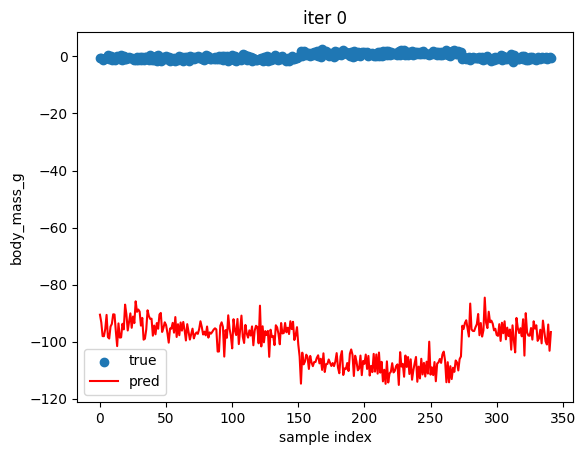

[20] loss = 4968.4849


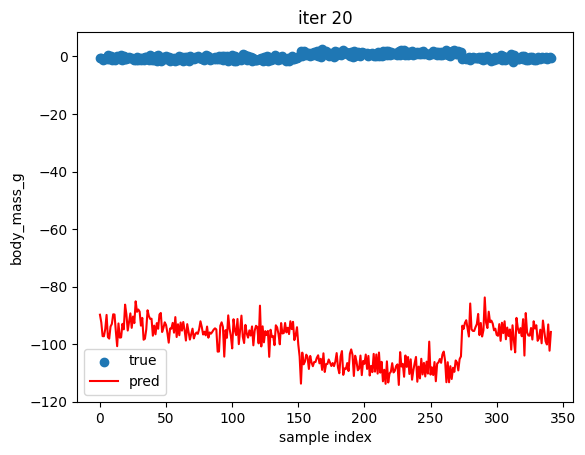

[40] loss = 4884.7316


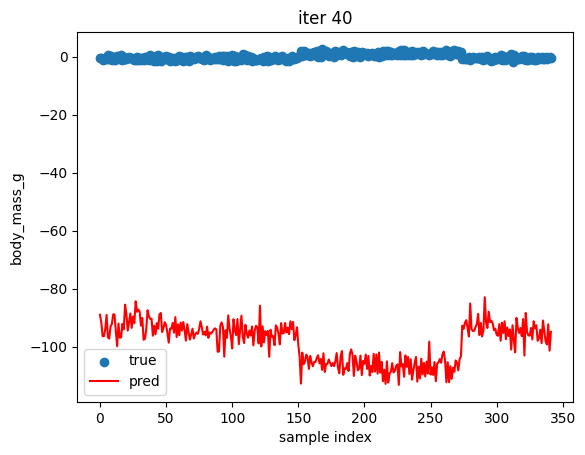

[60] loss = 4802.3906


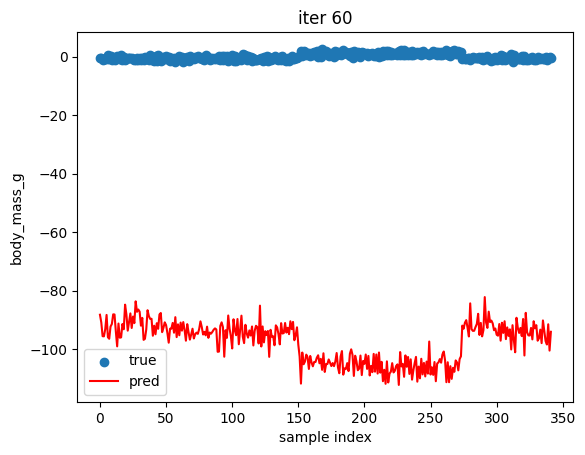

[80] loss = 4721.4380


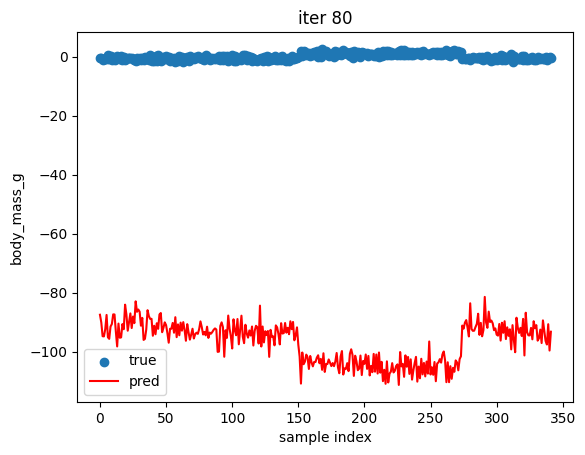

[100] loss = 4641.8506


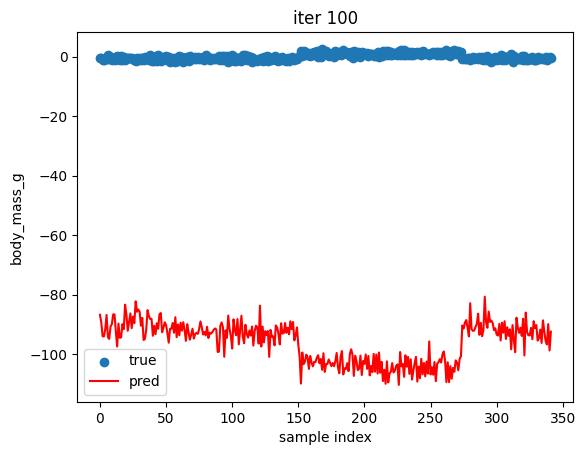

[120] loss = 4563.6053


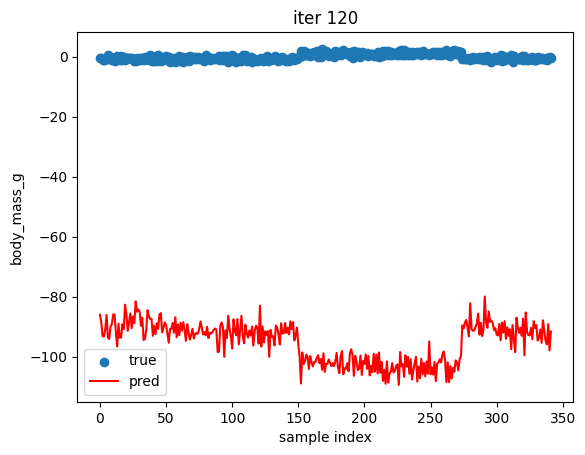

[140] loss = 4486.6794


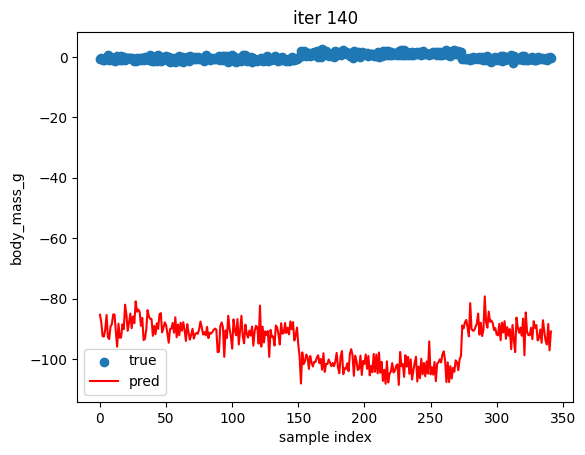

[160] loss = 4411.0506


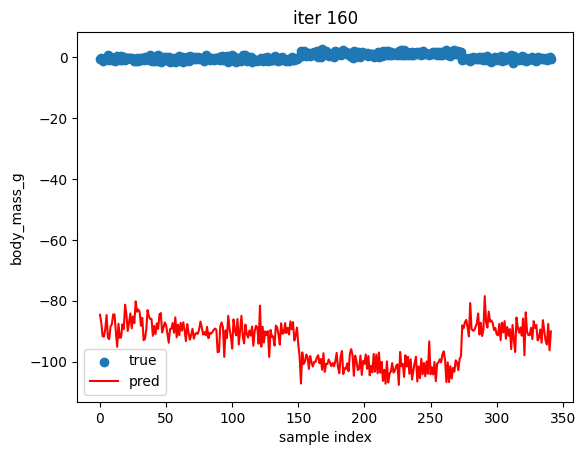

[180] loss = 4336.6972


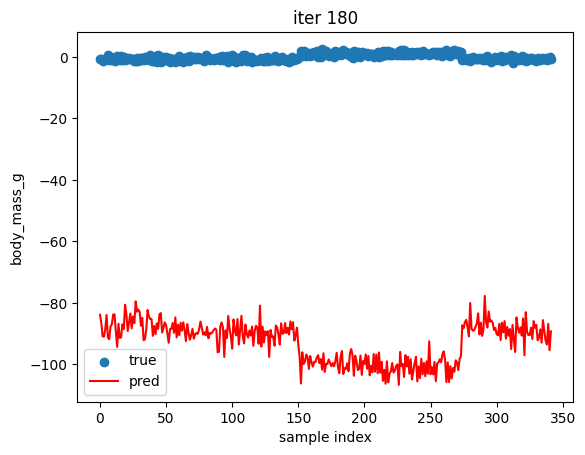

RMSE = 73946.39
MAE = 73720.45
Error Percentage = 1754.52%
Final W: [ 0.32535934 -0.52484038 -0.90266523]


In [7]:
def show_plot(y_pred, Y):
    plt.scatter(np.arange(len(Y)), Y, label="true")
    plt.plot(y_pred, label="pred", color="red")
    plt.legend()
    plt.xlabel("sample index")
    plt.ylabel("body_mass_g")
def predict(W, X):
    y_pred = np.dot(X, W)
    return y_pred

def J(y_pred, Y):
    loss = 1 / 2 * (y_pred - Y)**2
    return loss

def J_gradient(y_pred, Y, X):
    j_gradients = (y_pred - Y)*X # list of all gradients for each training sample
#     return j_gradients
    grad_mean = j_gradients.mean(axis=0)              # mean gradient over samples
    return grad_mean.reshape(-1, 1)

def W_update(W_old, j_grad, alpha=0.00000001):
    W_new = W_old - alpha * j_grad
    return W_new




# اختيار الأعمدة من Penguins
features = ['bill_length_mm', 'flipper_length_mm']
target = 'body_mass_g'

# حذف الصفوف اللي فيها قيم ناقصة
df2 = df[features + [target]].dropna()

# تحويل لـ numpy
X = df2[features].to_numpy()
Y = df2[target].to_numpy().reshape(-1, 1)


#الخط يقرب من النقاط
Y_mean = Y.mean()
Y_std = Y.std()
Y_scaled = (Y - Y_mean) / Y_std
Y = Y_scaled

print(X.shape, Y.shape)


use_bias = True

if use_bias:
    X = np.hstack((X, np.ones((X.shape[0], 1))))
print(X.shape)

W = 2 * np.random.uniform(size=(X.shape[1], 1)) - 1

alpha = 1e-8
epochs = 200

for i in range(epochs):
    y_pred = predict(W, X)  #نتوقع
    loss = J(y_pred, Y).mean()   #نحسب الخسارة
    j_grad = J_gradient(y_pred, Y, X)      #نحسب المشتقة(الاتجاه)
    W = W_update(W, j_grad, alpha)    #نحدث الوزن

    if i % 20 == 0:
        print(f"[{i}] loss = {loss:.4f}")
        show_plot(y_pred, Y)
        plt.title(f"iter {i}")
        plt.show()
        plt.close()

        # التنبؤ النهائي
y_pred_final = predict(W, X)

# فك القياس (ارجاع للقيم الأصلية)
Y_true = Y * Y_std + Y_mean
Y_pred = y_pred_final * Y_std + Y_mean

# Mean Absolute Error
mae = np.mean(np.abs(Y_pred - Y_true))

# نسبة الخطأ
error_percentage = (mae / np.mean(Y_true)) * 100

mse = np.mean((Y_pred - Y_true)**2)
rmse = np.sqrt(mse)


print(f"RMSE = {rmse:.2f}")
print(f"MAE = {mae:.2f}")
print(f"Error Percentage = {error_percentage:.2f}%")
print("Final W:", W.reshape(-1))